# Analyzing bike trips

In [2]:
import pandas as pd
import json
import datetime as dt
from pytz import timezone
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib.dates as mdate
import numpy as np
from haversine import haversine, Unit
import folium

In [3]:
# global settings for the charts
plt.rcParams['font.family'] = 'FreeSerif'
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['figure.titlesize'] = 26
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.fontsize'] = 18

sao_paulo = [-23.5489, -46.6388]

In [4]:
trips = pd.read_csv('../../../yellow/saida.csv')
print(len(trips), 'trips')
trips.head()

427026 trips


tripid  \
0  75b1aba38fc22016e5770e8b5c5e517efee06ed23544d1...   
1  daadf046a3b54be5dfa3885ae8e91b416d301b8c2cdd6e...   
2  0dce3489467eb12a7f6df6e9dd219fae235414192cfd7d...   
3  e41936fda2bdf2baefef3ae2d007405768d2dfb1a69d74...   
4  d79a96b92300855c6756872fe342c9cf6da9d0f87b1c78...   

                                              bikeid  \
0  3c03eee3949f1f26daae3903d18b68a4c4e8eed59a3729...   
1  3c03eee3949f1f26daae3903d18b68a4c4e8eed59a3729...   
2  3c03eee3949f1f26daae3903d18b68a4c4e8eed59a3729...   
3  3c03eee3949f1f26daae3903d18b68a4c4e8eed59a3729...   
4  3c03eee3949f1f26daae3903d18b68a4c4e8eed59a3729...   

                        timestamps                               lats  \
0                 [1535376181.586]                [-23.5929358843934]   
1  [1535379421.701,1535379421.733]  [-23.594451904296875,-23.5944525]   
2                 [1535382141.792]                      [-23.5901707]   
3                 [1535383270.083]                [-23.5807991400581]   
4                 [1535385729.579]                [-23.5815868750092]   

                              longs  
0               [-46.6806704085755]  
1  [-46.68463134765625,-46.6846324]  
2                     [-46.6865773]  
3               [-46.6839137860077]  
4               [-46.6855699552242]

In [5]:
calculated = pd.read_csv('../../../yellow/calculated-variables.csv', parse_dates=['start_time'])
trips = trips.merge(calculated, on='tripid', how='left')

### Trips per month

In [6]:
trip_time_series = trips[['tripid','start_time']]
trip_time_series.set_index(pd.DatetimeIndex(trip_time_series['start_time']), inplace=True)

In [7]:
#daily average per month
trips_day_average = trip_time_series['start_time'].groupby(pd.Grouper(freq='D')).count()
trips_per_month = trips_day_average.groupby(pd.Grouper(freq='MS')).agg(mean='mean',std='std')

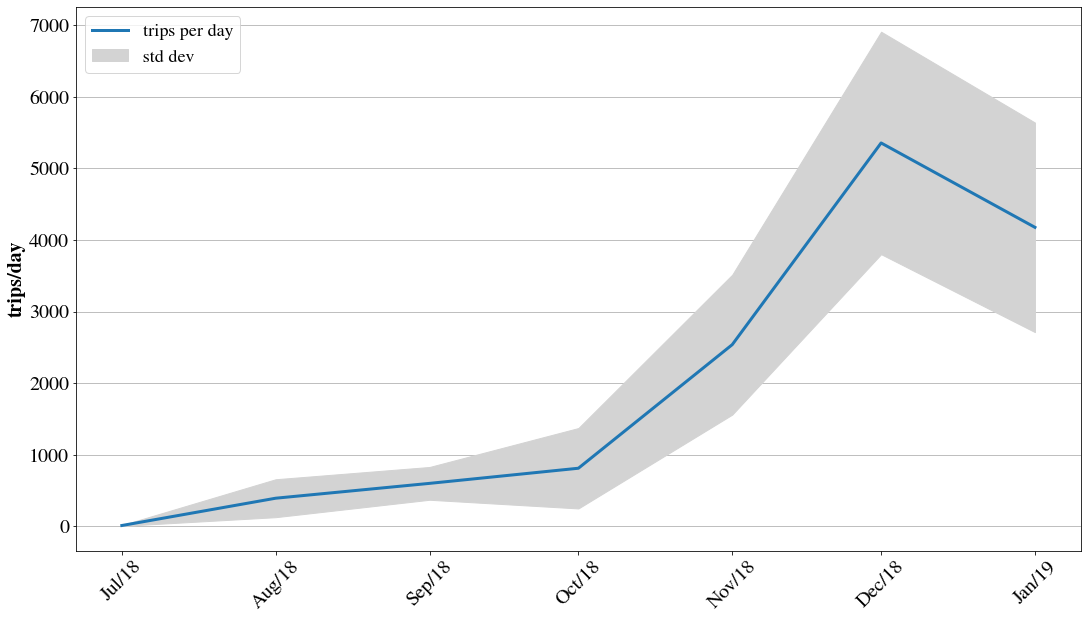

In [8]:
#trips_per_month.plot()
dateFmt = mdate.DateFormatter('%b/%y')
ax_day_avg_trips = plt.axes()
ax_day_avg_trips.set_axisbelow(True)
ax_day_avg_trips.xaxis.grid(False)
ax_day_avg_trips.yaxis.grid(True)
ax_day_avg_trips.plot(trips_per_month['mean'], label='trips per day', linewidth=3)
ax_day_avg_trips.figure.set_size_inches(18,10)
ax_day_avg_trips.xaxis.set_major_formatter(dateFmt)
ax_day_avg_trips.xaxis.set_minor_locator(mdate.MonthLocator())

plt.ylabel('trips/day')

plt.xticks(rotation=45)
plt.yticks(np.arange(0,7001,step=1000))
plt.fill_between(trips_per_month.index,trips_per_month['mean']-trips_per_month['std'],
                 trips_per_month['mean']+trips_per_month['std'],color='lightgray',label='std dev')
plt.legend(loc='upper left')

#plt.savefig('charts/Trips-Per-Month.pdf', format='pdf', dpi=200)
plt.draw()